# 2024-1 Artificial Intelligence (01)
## Homework #2: Implementation of a CNN with TensforFlow Keras
---
Copyright (c) Prof. Jaehyeong Sim

Department of Computer Science and Engineering

ELTEC College of Engineering

Ewha Womans University

## Guideline
### Introduction
> Here in this homework assignment 2, we will implement a CNN using TensorFlow Keras library.

### Your job
1. Please complete the code. You only have to write the parts marked as **### Please fill here**.
2. Please run your code with GPU session
3. Please answer the questions at the bottom of this notebook.

### Submission guide
1. Please rename the completed skeleton file to ***STUDENT_ID*.ipynb**. Your own student ID goes to *STUDENT_ID*. For example, if your student ID is 2412345, the file name should be **2412345.ipynb**
2. Turn in it into the Ewha CyberCampus

⚠ If you doesn't follow the submission guide above, you will get **5 point deduction** from this homework score.

### Importing necessary libraries

In [1]:
import tensorflow.keras as keras
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Conv2D, Flatten, AvgPool2D, Dense, Dropout, Input, MaxPool2D, BatchNormalization, Activation, Add
from tensorflow.keras.regularizers import l2

### Loading and preprocessing MNIST dataset

In [2]:
(X_train, y_train), (X_valid, y_valid) = mnist.load_data()
X_train = X_train.reshape(60000, 28, 28, 1).astype('float32')
X_valid = X_valid.reshape(10000, 28, 28, 1).astype('float32')
X_train /= 255
X_valid /= 255
n_classes = 10
y_train = keras.utils.to_categorical(y_train, n_classes)
y_valid = keras.utils.to_categorical(y_valid, n_classes)

11490434/11490434 [==============================] - 1s 0us/step


### Define residual block
**Parameters:**
*   x: input
*   ch: output channel size
*   k: kernel size

**Return:**
*   final output

**The diagram of residual block:**

![[2023-1 AI] HW2.png](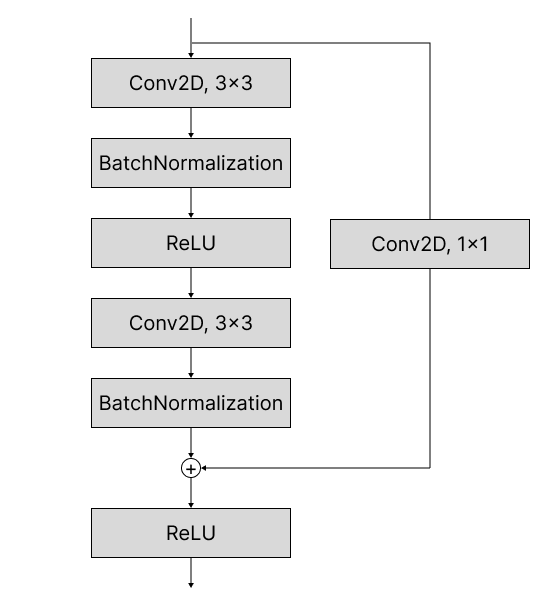)

In [14]:
def ResidualBlock(x, ch, k, dropout=False):


    x_skip = Conv2D(filters=ch, kernel_size=(1, 1))(x) # save original x, 1x1 conv make output size same and channel size apative
    x = Conv2D(filters=ch, kernel_size=(k, k),strides=1, activation='tanh',padding="same")(x)
    x = BatchNormalization()(x)
    if dropout:
      x = Dropout(rate=0.3)(x)
    x = Activation('relu')(x)
    if dropout:
      x = Dropout(rate=0.3)(x)
    x = Conv2D(filters=ch, kernel_size=(k, k),strides=1, activation='tanh',padding="same")(x)
    if dropout:
      x = Dropout(rate=0.3)(x)
    x = BatchNormalization()(x)

    x = Add()([x, x_skip]) # calc f(x) + x

    x = Activation('relu')(x)

    return x



### Define the whole network
**The diagram of ResNet7:**

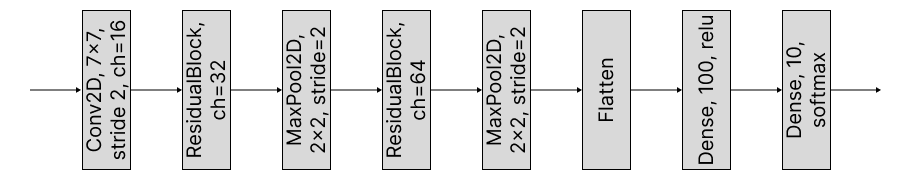

In [15]:
def ResNet7(dropout=False,regularizer=None):

    x = Input(shape=(28, 28, 1))
    y = Conv2D(filters=16, kernel_size=7, strides=2, activation='tanh', kernel_regularizer=regularizer)(x)
    y = ResidualBlock(y,32,3,dropout=dropout)
    y = MaxPool2D(pool_size=(2,2),strides=2)(y)
    y = ResidualBlock(y,64,3,dropout=dropout)
    y = MaxPool2D(pool_size=(2,2),strides=2)(y)
    y = Flatten()(y)
    y = Dense(100, activation='relu', kernel_regularizer=regularizer)(y)

    if dropout:
      y = Dropout(rate=0.5)(y)

    y = Dense(10, activation='softmax', kernel_regularizer=regularizer)(y)

    model = models.Model(inputs=x, outputs=y)

    model.compile(loss='categorical_crossentropy',
                  optimizer=keras.optimizers.Adam(),
                  metrics=['accuracy'])

    return model

### Model instantiation

In [16]:
model1 = ResNet7() # basic model
model2 = ResNet7(dropout=True) # dropout model
model3 = ResNet7(dropout=True,regularizer=l2(0.001)) # regularizer model


### Training loop

In [17]:
history1 = model1.fit(
    X_train,
    y_train,
    batch_size = 256,
    epochs = 20,
	  verbose = 1,
    validation_data=(X_valid, y_valid))

history2 = model2.fit(
    X_train,
    y_train,
    batch_size = 256,
    epochs = 20,
	  verbose = 1,
    validation_data=(X_valid, y_valid))

history3 = model3.fit(
    X_train,
    y_train,
    batch_size = 256,
    epochs = 20,
	  verbose = 1,
    validation_data=(X_valid, y_valid))


Epoch 1/20
235/235 [==============================] - 7s 14ms/step - loss: 1.3162 - accuracy: 0.5504 - val_loss: 0.6911 - val_accuracy: 0.7686
Epoch 2/20
235/235 [==============================] - 2s 10ms/step - loss: 0.3913 - accuracy: 0.8826 - val_loss: 0.3038 - val_accuracy: 0.9080
Epoch 3/20
235/235 [==============================] - 2s 10ms/step - loss: 0.2517 - accuracy: 0.9273 - val_loss: 0.1353 - val_accuracy: 0.9570
Epoch 4/20
235/235 [==============================] - 2s 10ms/step - loss: 0.1961 - accuracy: 0.9442 - val_loss: 0.0980 - val_accuracy: 0.9697
Epoch 5/20
235/235 [==============================] - 2s 10ms/step - loss: 0.1669 - accuracy: 0.9524 - val_loss: 0.0860 - val_accuracy: 0.9758
Epoch 6/20
235/235 [==============================] - 3s 12ms/step - loss: 0.1485 - accuracy: 0.9583 - val_loss: 0.0581 - val_accuracy: 0.9830
Epoch 7/20
235/235 [==============================] - 3s 11ms/step - loss: 0.1310 - accuracy: 0.9627 - val_loss: 0.0531 - val_accuracy: 0.9844

### Plot training curve

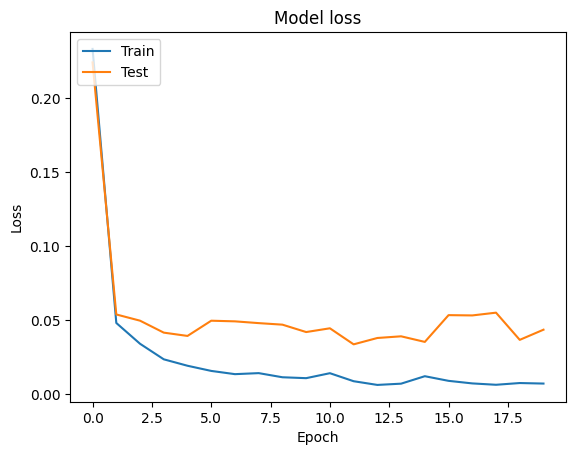

In [18]:
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

### Perform evaluation

In [19]:
(loss1, accuracy1) = model1.evaluate(
    X_valid,
    y_valid,
    batch_size = 128,
    verbose = 1)

(loss2, accuracy2) = model2.evaluate(
    X_valid,
    y_valid,
    batch_size = 128,
    verbose = 1)

(loss3, accuracy3) = model3.evaluate(
    X_valid,
    y_valid,
    batch_size = 128,
    verbose = 1)


79/79 [==============================] - 0s 4ms/step - loss: 0.0567 - accuracy: 0.9916


### Question 1. Report training curve (Epoch vs. Loss) and final validation accuracy without any regularization method.

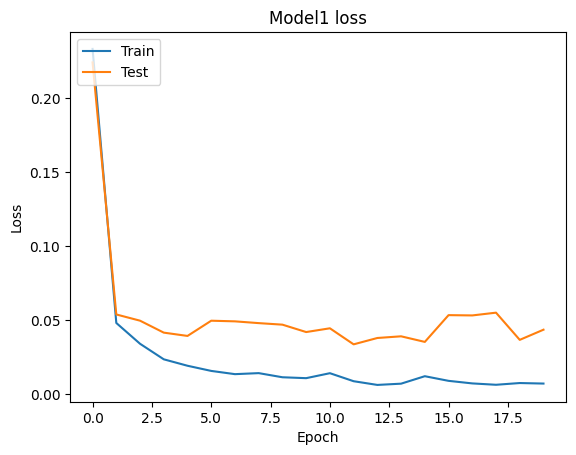

model1 validation accuracy:  0.9884999990463257


In [10]:
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.title('Model1 loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

print("model1 validation accuracy: ",accuracy1)


### Question 2. Report training curve (Epoch vs. Loss) and final validation accuracy with dropout applied (dropout rate: 0.3). Explain how you applied dropout on your code.

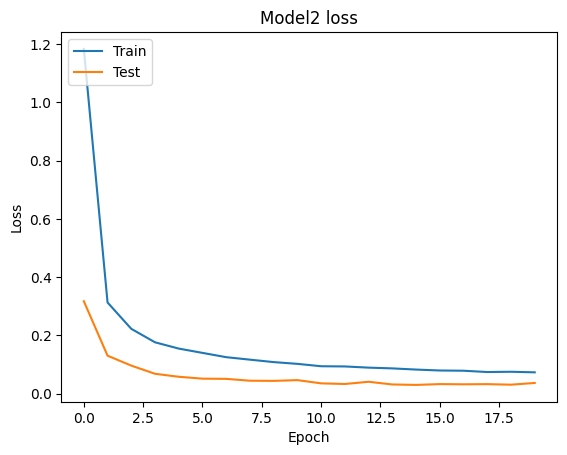

model2 validation accuracy:  0.9884999990463257


In [11]:
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('Model2 loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

print("model2 validation accuracy: ",accuracy2)

#### Answer: Using dropout, which means selectively omits neurons in the neural network, can solve overfitting problem by preventing complex co-adaptations on the training data. Thus, **applying dropout appropriately leads to increase of training loss while validation loss decreases, which means higher validation accuracy**.


#### Dropout is applied on my code like below


```
# inside the ResidualBlock
x = BatchNormalization()(x)
    if dropout:
      x = Dropout(rate=0.3)(x)
    x = Activation('relu')(x)
    if dropout:
      x = Dropout(rate=0.3)(x)
    x = Conv2D(filters=ch, kernel_size=(k, k),strides=1, activation='tanh',padding="same")(x)
    if dropout:
      x = Dropout(rate=0.3)(x)
    x = BatchNormalization()(x)
```


```
#  after the first fully connected layer with a dropout rate of 0.5.
y = Dense(100, activation='relu')(y)

    if dropout:
      y = Dropout(rate=0.5)(y)

    y = Dense(10, activation='softmax')(y)
```

### Question 3. Report training curve (Epoch vs. Loss) and final validation accuracy with dropout and weight decay applied (L2 regularization with 0.001). Explain how you applied weight decay on your code.

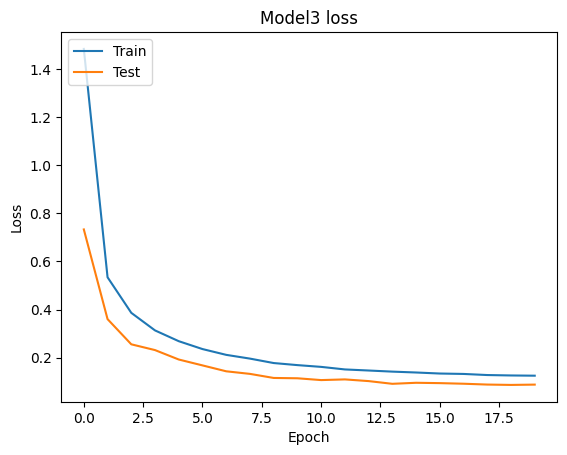

model2 validation accuracy:  0.9908999800682068


In [12]:
plt.plot(history3.history['loss'])
plt.plot(history3.history['val_loss'])
plt.title('Model3 loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

print("model2 validation accuracy: ",accuracy3)

#### Answer: L2 regularization is one of the regularization techniques that limits the neural network model's weights to reduce overfitting.  Thus, **Thus, applying L2 regularization appropriately leads to increase of training loss while validation loss decreases, which means higher validation accuracy**.

I applied L2 Regularization **on the first convolution layer** like below

```
 y = Conv2D(filters=16, kernel_size=7, strides=2, activation='tanh', kernel_regularizer=regularizer)(x)

 y = Dense(100, activation='relu', kernel_regularizer=regularizer)(y)

 y = Dense(10, activation='softmax', kernel_regularizer=regularizer)(y)
```

